In [4]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import netCDF4 as nc4
import os
import cmocean.cm as cm
import moviepy.video.io.ImageSequenceClip
from datetime import datetime, timedelta

In [66]:
delX = 1/48
delY = 1/48
xgOrigin = -68
ygOrigin = 62
n_rows = 440
n_cols = 960
Nr = 50

xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY, delY)
XC, YC = np.meshgrid(xc, yc)
print(np.shape(XC))
print(np.shape(YC))

model_folder = '/Users/cool/Workspace/MLML/ms274_fall2025/Project/high_res/run/'
file_list = []


(440, 960)
(440, 960)


# Checking data from timesteps, high-res

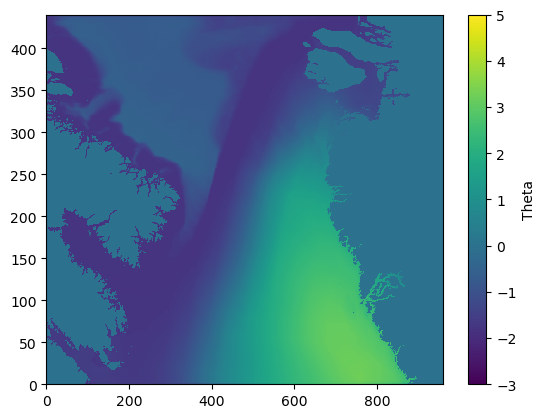

In [71]:
grid = np.fromfile(os.path.join(model_folder, 'diags', 'TS_surf_daily_mean', 'TS_surf_daily_mean.0000017280.data'), '>f4').reshape((2, n_rows, n_cols))
np.shape(grid)
plt.pcolormesh(grid[0, :, :], vmin=-3, vmax = 5)
plt.colorbar(label='Theta')

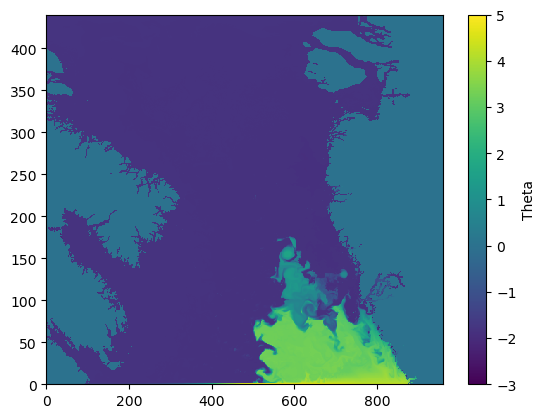

In [72]:
grid = np.fromfile(os.path.join(model_folder, 'diags', 'TS_surf_daily_mean', 'TS_surf_daily_mean.0000178560.data'), '>f4').reshape((2, n_rows, n_cols))
np.shape(grid)
plt.pcolormesh(grid[0, :, :], vmin=-3, vmax = 5)
plt.colorbar(label='Theta')

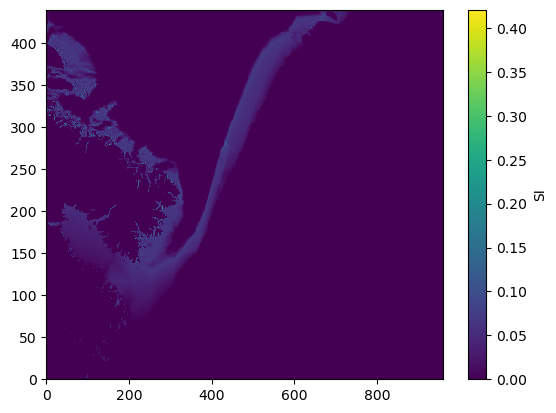

In [73]:
grid = np.fromfile(os.path.join(model_folder, 'diags', 'SI_daily_snap', 'SI_daily_snap.0000008640.data'), '>f4').reshape((5, 1, n_rows, n_cols))
np.shape(grid)
plt.pcolormesh(grid[0, 0, :, :])
plt.colorbar(label='SI')

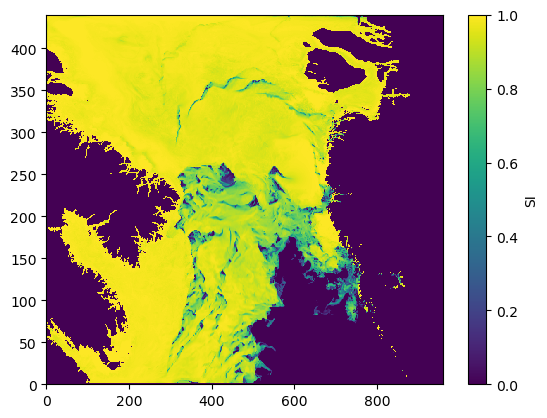

In [74]:
grid = np.fromfile(os.path.join(model_folder, 'diags', 'SI_daily_snap', 'SI_daily_snap.0000179280.data'), '>f4').reshape((5, 1, n_rows, n_cols))
np.shape(grid)
plt.pcolormesh(grid[0, 0, :, :])
plt.colorbar(label='SI')

Text(0.5, 1.0, 'heat transport, northward')

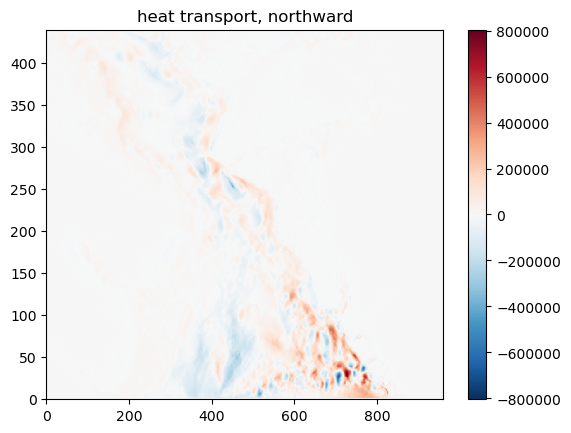

In [76]:
# grid = np.fromfile(os.path.join(model_folder, 'diags', 'heat_flux_daily_mean', 'heat_flux_daily.0000000576.data'), '>f4').reshape((2, 50, n_rows, n_cols))
grid = np.fromfile(os.path.join(model_folder, 'diags', 'heat_flux_daily_mean', 'heat_flux_daily.0000084960.data'), '>f4').reshape((2, 50, n_rows, n_cols))
np.shape(grid)

net_transport_xy = np.sum(grid, axis=1)
adv_y_int = net_transport_xy[1, :, :]
max_val = np.max(np.abs(adv_y_int))  
plt.pcolormesh(adv_y_int, cmap='RdBu_r', vmin=-max_val, vmax=max_val, shading='auto')
plt.colorbar()
plt.title('heat transport, northward')

Text(0.5, 1.0, 'heat transport, eastward')

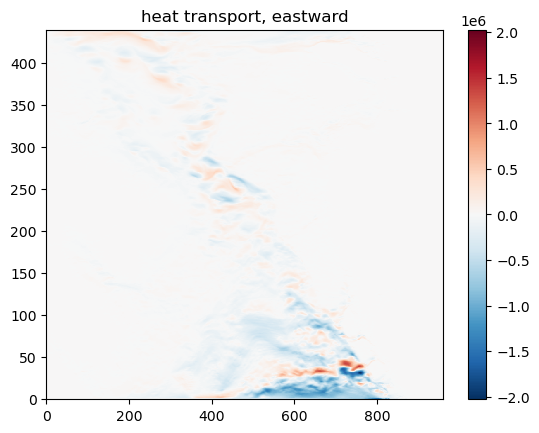

In [77]:
# grid = np.fromfile(os.path.join(model_folder, 'diags', 'heat_flux_daily_mean', 'heat_flux_daily.0000000576.data'), '>f4').reshape((2, 50, n_rows, n_cols))
grid = np.fromfile(os.path.join(model_folder, 'diags', 'heat_flux_daily_mean', 'heat_flux_daily.0000084960.data'), '>f4').reshape((2, 50, n_rows, n_cols))
np.shape(grid)

net_transport_xy = np.sum(grid, axis=1)
adv_y_int = net_transport_xy[0, :, :]
max_val = np.max(np.abs(adv_y_int))  
plt.pcolormesh(adv_y_int, cmap='RdBu_r', vmin=-max_val, vmax=max_val, shading='auto')
plt.colorbar()
plt.title('heat transport, eastward')

# looping to make movies
some differing loops due to timesteps being changed 

In [69]:
start_date = datetime(1997, 1, 24)
# start_date = datetime(1997, 1, 24) 
# start_date = datetime(1997, 1, 25) 
delta_t = 30  # seconds

# define a plot_frame function which takes in two arguments:
#    - the file path of a uvel file to read
#    - the file path where the plot will be stored
def plot_frame(data_path, image_path, date_label): 

    fig = plt.figure(figsize = (10,6))

    u_grid = np.fromfile(data_path, '>f4').reshape((5,n_rows, n_cols))
    # plt.pcolormesh(u_grid[0,:,:], cmap=cm.thermal, vmin=-2, vmax=5)
    plt.pcolormesh(u_grid[0,:,:], cmap=cm.ice, vmin=0, vmax=1)

    # u_grid = np.fromfile(data_path, '>f4').reshape((2,50, n_rows, n_cols))
    # net_transport_xy = np.sum(u_grid, axis=1)
    # adv_y_int = net_transport_xy[0, :, :]
    # max_val = 5e6
    # plt.pcolormesh(adv_y_int, cmap='RdBu_r', vmin=-max_val, vmax=max_val, shading='auto')
    # plt.colorbar(label='Net Heat Transport (DegC m³/s)')
    # plt.title(f'Zonal Heat Transport  - {date_label}')
    
    # add a colorbar
    # plt.colorbar(label='Degrees C')
    plt.colorbar(label='SI %')
    plt.xlabel('Model Columns')
    plt.ylabel('Model Rows')
    # plt.title(f'Theta - {date_label}')
    plt.title(f'SI - {date_label}')
    
    # show the figure
    plt.savefig(image_path)
    plt.close(fig)# make a list that will hold the paths
# file_list = []

#for theta
# for day in range(20160, 37440, 2880):
# for day in range(37440, 178560 + 1, 1440):
#for SI
# for day in range(18000, 19440 + 1, 720):
# for day in range(21600, 36000 + 1, 2880):
for day in range(38160, 178560 + 1, 1440):
#for heat flux
# for day in range(20160, 37440 + 1, 2880):
# for day in range(37440, 84960 + 1, 1440):
    # --- Calculate the Date ---
    # Time elapsed = current iteration * seconds per step
    time_elapsed = timedelta(seconds=86400)
    current_date = start_date + time_elapsed
    
    # Format as string: "1997-01-16", etc.
    date_str = current_date.strftime('%Y-%m-%d')

    # identify the data file path
    # data_path = os.path.join(model_folder, 'diags', 'TS_surf_daily_mean', 'TS_surf_daily_mean.'+'{:010d}'.format(day)+'.data')
    data_path = os.path.join(model_folder, 'diags', 'SI_daily_snap', 'SI_daily_snap.'+'{:010d}'.format(day)+'.data')
    # data_path = os.path.join(model_folder, 'diags', 'heat_flux_daily_mean', 'heat_flux_daily.'+'{:010d}'.format(day)+'.data')

    # identify the image file path
    # image_path = os.path.join(model_folder, 'plots', 'Theta_daily', 'THETA.'+'{:010d}'.format(day)+'.png')
    image_path = os.path.join(model_folder, 'plots', 'SI_daily', 'SI.'+'{:010d}'.format(day)+'.png')
    # image_path = os.path.join(model_folder, 'plots', 'heat_flux_daily', 'heat_flux_daily.'+'{:010d}'.format(day)+'.png')

    

    # call the plotting function
    plot_frame(data_path, image_path, date_str)

    # add the imaghe path to the file path list (for the next step)
    file_list.append(image_path)
    start_date = current_date

In [70]:
# set the frames per second
fps=5

# use the ImageSequenceClip module to set up the clip
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(file_list, fps=fps)

# write the video to a file
output_file = os.path.join(model_folder, 'plots', 'SI_daily.mp4')
clip.write_videofile(output_file)

Moviepy - Building video /Users/cool/Workspace/MLML/ms274_fall2025/Project/high_res/run/plots/SI_daily.mp4.
Moviepy - Writing video /Users/cool/Workspace/MLML/ms274_fall2025/Project/high_res/run/plots/SI_daily.mp4



Moviepy - Done !
Moviepy - video ready /Users/cool/Workspace/MLML/ms274_fall2025/Project/high_res/run/plots/SI_daily.mp4
